#### Dataset "Salary_dataset.csv"

Taken from Kaggle

Works well with simple linear Regression

In [1]:
import pandas as pd
df=pd.read_csv("Salary_dataset.csv")
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [2]:
#Understanding the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [3]:
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


### Scatter plot
This step checks whether a linear relationship exists between experience and salary.

If points show an upward trend, Linear Regression is suitable.

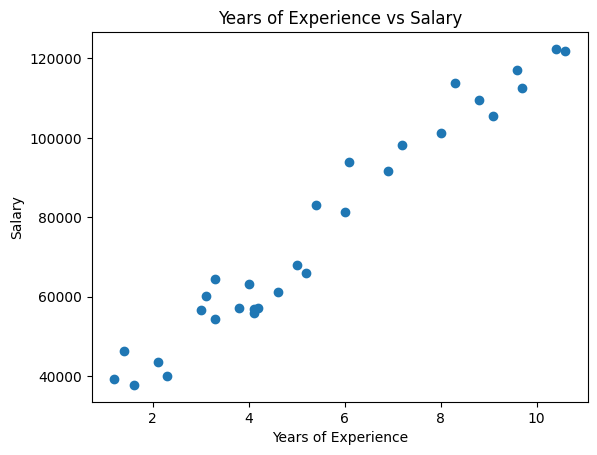

In [ ]:
#Relationship Check
#Scatter plot to check it satisfies simple linear regression based on obtained points

import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(df['YearsExperience'],df['Salary'])
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Years of Experience vs Salary")
plt.show()

x → input feature (must be 2D)

y → target output

This separation is required for supervised learning.

In [5]:
x=df[['YearsExperience']]
y=df['Salary']


80% data → training

20% data → testing

This ensures the model performs well on unseen data and prevents overfitting.

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Feature scaling standardizes values to improve model learning.

Fit only on training data → avoids data leakage

Same scaling applied to test data

In [7]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_std=sc.fit_transform(x_train)
x_test_std=sc.transform(x_test)

In [8]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train_std,y_train)
print("Co-efficient ",lr.coef_)
print("Intercept ",lr.intercept_)

Co-efficient  [27151.53742583]
Intercept  74208.625


In [9]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred=lr.predict(x_test_std))
print("R2 Score ",r2)

R2 Score  0.9024461774180498


In [10]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
mse=mean_squared_error(y_test,y_pred=lr.predict(x_test_std))
print("MSE ",mse)
rmse=np.sqrt(mse)
print("RMSE ",rmse)

MSE  49830096.85590836
RMSE  7059.043621901507


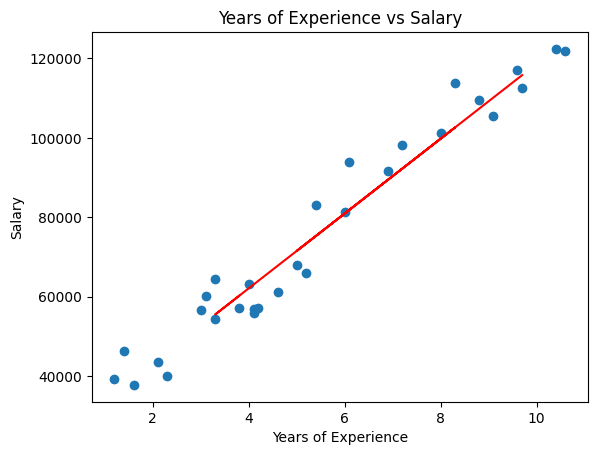

In [11]:
plt.scatter(x,y)
plt.plot(x_test,lr.predict(x_test_std),color='red')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Years of Experience vs Salary")
plt.show()

In [14]:
import pandas as pd
yearsexp = float(input("Enter years of experience: "))
years = pd.DataFrame([[yearsexp]], columns=["YearsExperience"])
years_scaled = sc.transform(years)
salary = lr.predict(years_scaled)
print(f"Predicted Salary: {salary[0]:.2f}")


Predicted Salary: 43227.83
